In [1]:
import pandas as pd
babies = pd.read_csv("babies23.txt", delim_whitespace=True)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Columns in the dataset
babies.columns

Index(['id', 'pluralty', 'outcome', 'date', 'gestation', 'sex', 'wt', 'parity',
       'race', 'age', 'ed', 'ht', 'wt.1', 'drace', 'dage', 'ded', 'dht', 'dwt',
       'marital', 'inc', 'smoke', 'time', 'number'],
      dtype='object')

**Use to get a good summary of a specific row of the data** 

In [3]:
# column_obs = 'race'
# babies[column_obs].plot(kind = 'hist')
# babies[column_obs].value_counts()

## Rows removed because they were all the same

In [4]:
print("Min of 'pluralty': " + str(babies['pluralty'].min()))
print("Max of 'pluralty': " + str(babies['pluralty'].max()))
print("---------------------")
print("Min of 'outcome': " + str(babies['outcome'].min()))
print("Max of 'outcome': " + str(babies['outcome'].max()))
print("---------------------")
print("Min of 'sex': " + str(babies['sex'].min()))
print("Max of 'sex': " + str(babies['sex'].max()))

#dropping the rows
babies = babies.drop(['outcome', 'pluralty','sex'], axis = 1)

Min of 'pluralty': 5
Max of 'pluralty': 5
---------------------
Min of 'outcome': 1
Max of 'outcome': 1
---------------------
Min of 'sex': 1
Max of 'sex': 1


## Some variables that might be cool to explore
- 'race' has a few half that is the same and half isn't, not bad
- 'age'/'dage' has a lot of good data with decent variation
- 'race'/'drace'   " "
- 'ed'/'ded', like age, has a lots of different results

## Probably not a good idea to explore
- 'marital' has some interesting data, but only about 20 rows of it
- 'pluralty', 'outcome', and 'sex' were all removed cause they were all the same number for each row

In [5]:
babies_clean = babies[babies.race < 99]
babies_clean = babies_clean[babies_clean.smoke < 99]

clean_smoke = babies_clean['smoke'].apply(lambda x: 0 if x!=1 else x)
babies_clean['smoke'] = clean_smoke

In [6]:
babies_clean['smoke'].value_counts(sort = False)

0    752
1    483
Name: smoke, dtype: int64

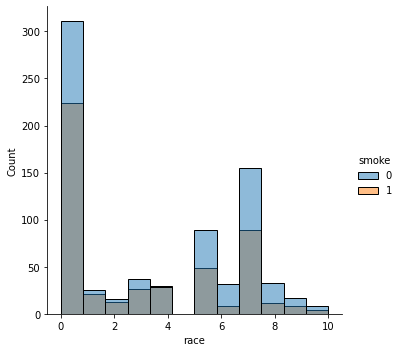

In [7]:
sns.displot(data = babies_clean,
                x='race',
                hue='smoke',
                kind = 'hist')

## I want to flatten and clean the graph above

In [8]:
#combines all the white races into one
clean_race = babies_clean['race'].apply(lambda x: 5 if x<=5 else x)
assert sum(babies_clean['race']<=5) == sum(clean_race<=5)
babies_clean['race'] = clean_race

In [9]:
smokeByRace = babies_clean[['race', 'smoke']].groupby('race').sum()['smoke']
totalByRace = babies_clean['race'].value_counts(sort = False)

In [10]:
difference_norm = (totalByRace - 2*smokeByRace)
difference_norm#.plot(kind = 'bar')

5     144
6      24
7      66
8      22
9       9
10      4
dtype: int64

<AxesSubplot:>

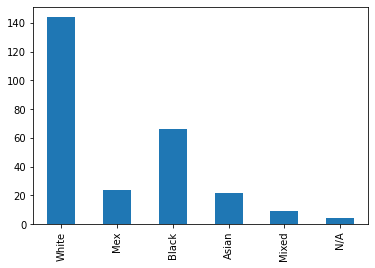

In [11]:
race_diff = difference_norm.to_list()
race_diff = pd.Series(index = ['White','Mex','Black','Asian','Mixed','N/A'], data = race_diff)
race_diff.plot(kind = 'bar')

## It's Flattened and cleaned but still pretty ugly
- Let's add some color and labels in seaborn

In [12]:
# sns.color_palette("coolwarm")

Text(0, 0.5, '#non smokers - #smokers')

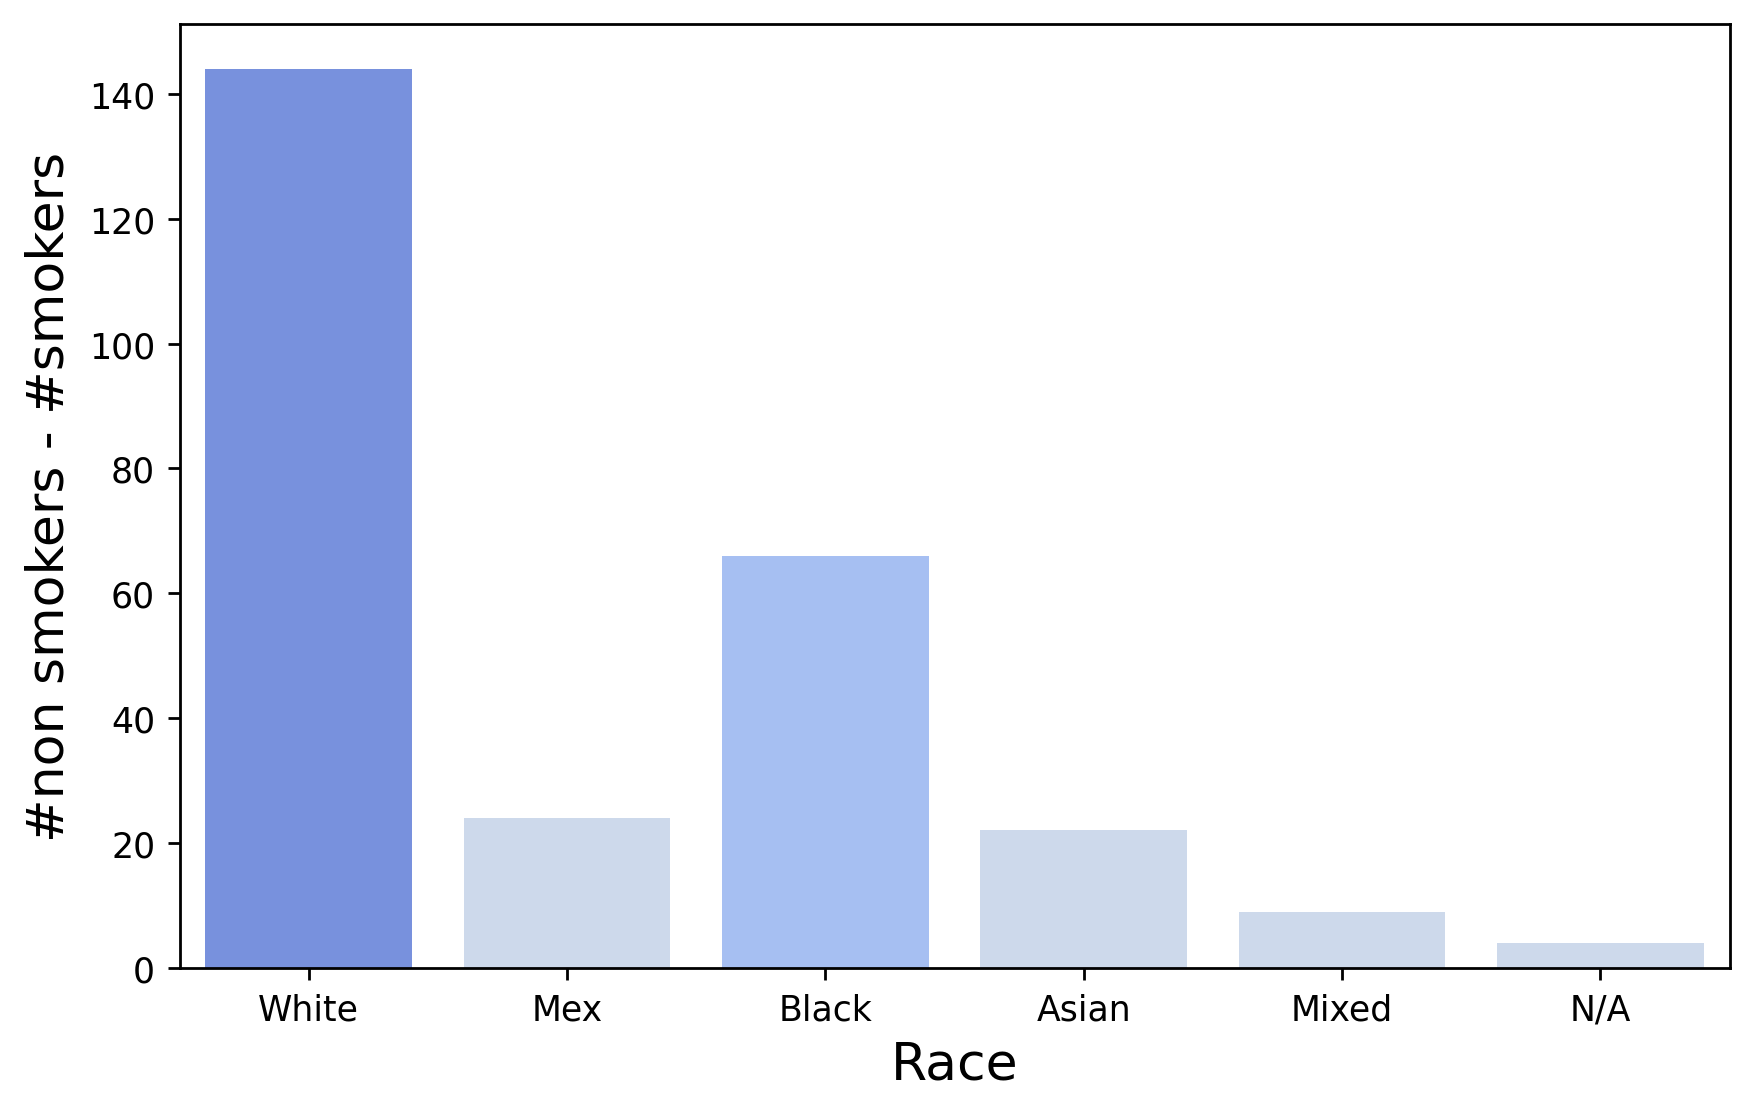

In [13]:
# custom color pallette from seaborn
colors = sns.color_palette("coolwarm")
# ordering colors manually cause making an algorithm for 6 bars isn't worth
# plus most already established ones dont handle negatives at all
colors_ordered = (colors[0], colors[2], colors[1], colors[2], colors[2], colors[2])

fig,ax = plt.subplots(figsize=(8,5), dpi = 250)
ax = sns.barplot(y =race_diff.to_list(), x = race_diff.index, palette = colors_ordered)
ax.set_xlabel("Race",fontsize=15)
ax.set_ylabel('#non smokers - #smokers',fontsize=15)

In [14]:
# For downloading the png
# ax.get_figure().savefig("raceSmokeDiff2.png")

## White people smoke more often than not
- **and their smoking habits aren't similar to non-white**

In [15]:
print("Percentage of white who smoke: " + str(round(babies_clean[babies_clean['race']<6]['smoke'].mean()*100,2))+'%')
print("Percentage of non-white who smoke: " + str(round(babies_clean[babies_clean['race']>=6]['smoke'].mean()*100,2))+'%')

Percentage of white who smoke: 41.72%
Percentage of non-white who smoke: 32.88%


## Non-white is under-represented

In [16]:
# rows of white
print('white in study: ' + str(babies['race'].value_counts(sort = False)[:6].sum()))
# rows of non-white
print('non-white in study: ' + str(babies['race'].value_counts(sort = False)[6:-1].sum()))

white in study: 870
non-white in study: 365


In [17]:
# proportion of data from each race
props = babies_clean['race'].value_counts(sort = False)/sum(totalByRace)
pd.Series(index = ['White','Mex','Black','Asian','Mixed','N/A'], data = props.to_list())

White    0.704453
Mex      0.032389
Black    0.197571
Asian    0.035628
Mixed    0.020243
N/A      0.009717
dtype: float64

Text(0.5, 1.0, 'Weight Distribution, Smokers vs Non Smokers')

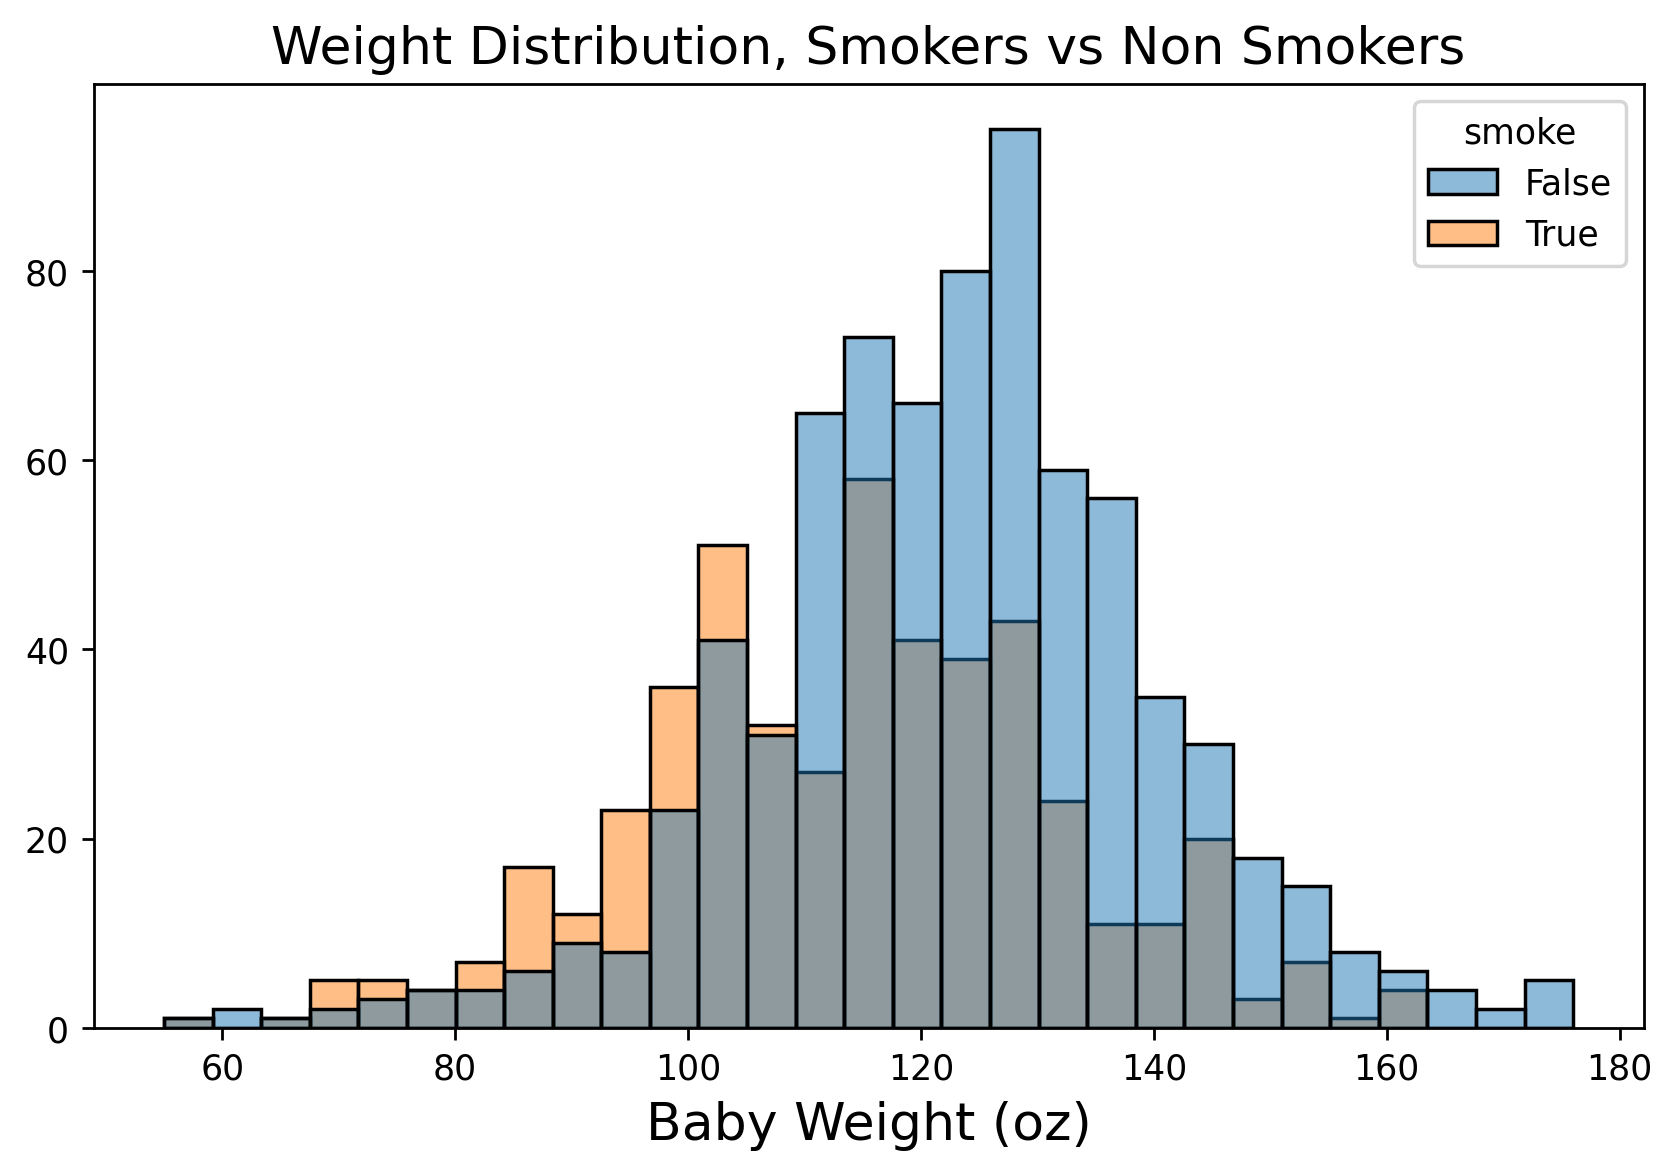

In [18]:
fig,ax = plt.subplots(figsize=(8,5), dpi = 250)
ax = sns.histplot(data=babies_clean, x = 'wt', hue=babies_clean['smoke'].astype('boolean'),ax = ax)
plt.xlabel('Baby Weight (oz)',fontsize=15)
plt.ylabel("")
plt.title('Weight Distribution, Smokers vs Non Smokers',fontsize=15)

In [19]:
# For downloading the png
# ax.get_figure().savefig("smokeWeight2.png")

In [20]:
# lower-q of smokers and non smokers baby weight
babies_clean[['wt', 'smoke']].groupby('smoke').quantile(.25)

,wt
smoke,
0,113.0
1,102.0


In [21]:
# std of smokers and non smokers baby weight
babies_clean[['wt', 'smoke']].groupby('smoke').std()

,wt
smoke,
0,17.451668
1,18.087623


In [22]:
# mean of smokers and non smokers baby weight
babies_clean[['wt', 'smoke']].groupby('smoke').mean()

,wt
smoke,
0,123.095745
1,114.062112
